# **What is a Multilayer Perceptron Neural Network?**

A multilayer perceptron (MLP) Neural network belongs to the feedforward neural network. It is an Artificial Neural Network in which all nodes are interconnected with nodes of different layers.  

 Perceptron is a basic unit of an artificial neural network that defines the artificial neuron in the neural network. It is a supervised learning algorithm containing nodes’ values, activation functions, inputs, and weights to calculate the output.

The Multilayer Perceptron (MLP) Neural Network works only in the forward direction. All nodes are fully connected to the network. Each node passes its value to the coming node only in the forward direction. The MLP neural network uses a Backpropagation algorithm to increase the accuracy of the training model.

### **Bengio et al - paper**

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 words = open('names.txt', 'r').read().splitlines()
 words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one
X, Y = [], []
for w in words[:5]:
  print('word = ', w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '---->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)


word =  emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
word =  olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
word =  ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
word =  isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
word =  sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype


(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [ ]:
C = torch.randn((27, 2))

**M - 1**

In [ ]:
ohe = F.one_hot(torch.tensor(5), num_classes=27).float()
ohe

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
ohe @ C

tensor([ 1.9475, -0.1347])

**M - 2**

In [ ]:
C[5]

tensor([ 1.9475, -0.1347])

In [ ]:
C[X].shape

torch.Size([32, 3, 2])

In [ ]:
C[X][1] # (. . e ) embeddings

tensor([[ 0.3164, -0.3860],
        [ 0.3164, -0.3860],
        [ 1.9475, -0.1347]])

In [ ]:
C[0] # .(embeddings)

tensor([ 0.3164, -0.3860])

### **Embedding**

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [ ]:
torch.cat(torch.unbind(emb, 1), 1).shape


torch.Size([32, 6])

In [ ]:
wx = emb.view(-1, 6) @ W1 + b1
wx

tensor([[-2.2617,  0.3026, -0.1834,  ..., -0.6752, -0.7545,  0.3809],
        [-1.8762, -2.2431,  0.1298,  ...,  0.3530,  0.9056, -0.0134],
        [-3.7597,  1.0160, -0.8819,  ..., -1.1492,  0.5776,  0.5008],
        ...,
        [-0.2454,  1.7780,  1.9967,  ..., -0.1389, -3.6904,  1.3404],
        [-1.8151,  1.8968, -0.9113,  ..., -1.6524, -1.4381, -0.0400],
        [-2.5018, -4.9251,  1.3778,  ...,  3.9003, -0.2387, -0.8956]])

In [ ]:
h = torch.tanh(wx)
h

tensor([[-0.9785,  0.2937, -0.1814,  ..., -0.5884, -0.6379,  0.3635],
        [-0.9542, -0.9777,  0.1291,  ...,  0.3390,  0.7190, -0.0134],
        [-0.9989,  0.7682, -0.7074,  ..., -0.8175,  0.5209,  0.4628],
        ...,
        [-0.2406,  0.9445,  0.9638,  ..., -0.1380, -0.9988,  0.8718],
        [-0.9483,  0.9560, -0.7217,  ..., -0.9292, -0.8933, -0.0400],
        [-0.9867, -0.9999,  0.8805,  ...,  0.9992, -0.2343, -0.7141]])

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)


In [ ]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [ ]:
exp = logits.exp()

In [ ]:
prob = exp / exp.sum(1, keepdim = True)
prob.shape

torch.Size([32, 27])

In [ ]:
prob[torch.arange(32), Y]

tensor([2.2034e-07, 4.3348e-10, 1.9209e-01, 1.4635e-05, 2.4339e-09, 1.2634e-03,
        1.3507e-05, 6.1496e-08, 1.5371e-03, 7.3940e-07, 9.9095e-07, 2.7236e-05,
        1.7566e-05, 2.4789e-01, 1.2743e-08, 2.0233e-09, 1.0570e-04, 1.1739e-05,
        8.4769e-07, 2.0365e-08, 9.4441e-12, 6.2366e-07, 1.1092e-07, 4.7038e-05,
        5.5696e-06, 1.0202e-04, 5.1866e-10, 1.4964e-04, 2.8825e-12, 1.9508e-06,
        3.8258e-04, 8.6100e-07])

### Summarizing the above

In [ ]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g,requires_grad= True)

# Weights and bias
W1 = torch.randn((6, 100), generator=g, requires_grad= True)
b1 = torch.randn(100, generator=g,requires_grad= True)

W2 = torch.randn((100, 27), generator=g,requires_grad= True)
b2 = torch.randn(27, generator=g,requires_grad= True)

parameters = [C, W1, b1, W2, b2]

In [ ]:
emb = C[X]

wx = emb.view(-1,6) @ W1 + b1
h = torch.tanh(wx)

logits = h @ W2 + b2
exp = logits.exp()
prob = exp / exp.sum(1, keepdim = True)
prob[torch.arange(32), Y]

loss = -prob[torch.arange(32), Y].log().mean()
loss


tensor(17.7697, grad_fn=<NegBackward0>)

### ***Now computing the above using cross entropy given in torch.nn.functional as it implements it very easily***

In [ ]:
emb = C[X]

wx = emb.view(-1,6) @ W1 + b1
h = torch.tanh(wx)

logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(17.7697, grad_fn=<NllLossBackward0>)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g,requires_grad= True)

# Weights and bias
W1 = torch.randn((6, 100), generator=g, requires_grad= True)
b1 = torch.randn(100, generator=g,requires_grad= True)

W2 = torch.randn((100, 27), generator=g,requires_grad= True)
b2 = torch.randn(27, generator=g,requires_grad= True)

parameters = [C, W1, b1, W2, b2]

In [ ]:
for epoch in range(20):
  # forward pass
  emb = C[X]
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y)
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update parameters
  for p in parameters:
    p.data += -0.1 * p.grad

17.76971435546875
13.656401634216309
11.298768997192383
9.452455520629883
7.984262466430664
6.891321182250977
6.100014686584473
5.452036380767822
4.898151874542236
4.414664268493652
3.985848903656006
3.6028308868408203
3.2621419429779053
2.961381196975708
2.6982977390289307
2.469712972640991
2.271660327911377
2.101283550262451
1.9571774005889893
1.8374857902526855


In [ ]:
params = [x.nelement() for x in parameters]
sum(params)

3481

In [ ]:
logits.max(1)

torch.return_types.max(
values=tensor([10.3765,  9.7808, 15.9531, 12.4269,  9.9291, 10.3765,  9.5849,  8.9140,
        12.1949, 13.1641,  9.6580, 15.8070, 10.3765, 10.6189, 10.8523, 12.6976,
        10.3765, 10.7718,  9.2004, 10.3824, 13.9289, 10.7242,  5.9444,  8.6032,
        12.9098, 10.3765, 10.8209, 11.4580,  8.9440, 13.7776, 11.3997,  9.6567],
       grad_fn=<MaxBackward0>),
indices=tensor([ 1, 12, 13,  1, 15,  1, 12,  9,  9,  9,  1,  0,  1,  0,  1,  0,  1, 19,
         1,  2,  5, 12, 12,  9,  0,  1, 15, 16,  8,  9,  1,  0]))

### What we done above is overfitting the model as we just used 32 data points for modelling 3481 parameters

In [ ]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one
X, Y = [], []
for w in words:
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '---->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g,requires_grad= True)

# Weights and bias
W1 = torch.randn((6, 100), generator=g, requires_grad= True)
b1 = torch.randn(100, generator=g,requires_grad= True)

W2 = torch.randn((100, 27), generator=g,requires_grad= True)
b2 = torch.randn(27, generator=g,requires_grad= True)

parameters = [C, W1, b1, W2, b2]

In [ ]:
losses = []

for epoch in range(100):
  # forward pass
  emb = C[X]
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y)
  losses.append(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update parameters
  for p in parameters:
    p.data += -0.1 * p.grad

In [ ]:
loss.item()

3.5892493724823

Text(0.5, 1.0, 'Gradient descend stat')

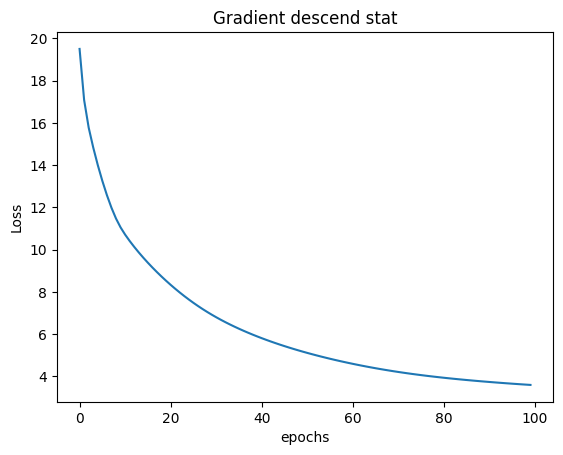

In [ ]:
plt.plot(range(100), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.title('Gradient descend stat')

### The above training is time-consuming, so we will use a mini-batch version of the above

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g,requires_grad= True)

# Weights and bias
W1 = torch.randn((6, 100), generator=g, requires_grad= True)
b1 = torch.randn(100, generator=g,requires_grad= True)

W2 = torch.randn((100, 27), generator=g,requires_grad= True)
b2 = torch.randn(27, generator=g,requires_grad= True)

parameters = [C, W1, b1, W2, b2]

In [ ]:
losses = []

for epoch in range(100):

  # minibatch
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]   # (32, 2, 3)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)   # (32, 100)
  logits = h @ W2 + b2   # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  losses.append(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update parameters
  for p in parameters:
    p.data += -0.1 * p.grad

In [ ]:
loss.item()

4.153761386871338

Text(0.5, 1.0, 'Minibatch stat')

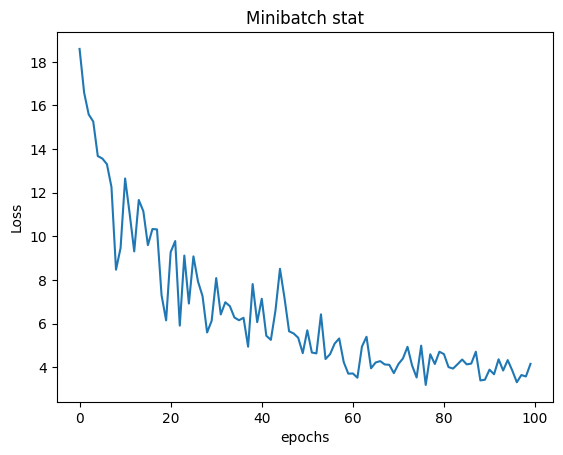

In [ ]:
plt.plot(range(100), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.title('Minibatch stat')

### Though the above initially have a higher loss, the training is very fast compared to the former

## **Finding a good learing rate**

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs[-10 :]

tensor([0.9397, 0.9462, 0.9528, 0.9594, 0.9660, 0.9727, 0.9795, 0.9863, 0.9931,
        1.0000])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g,requires_grad= True)

# Weights and bias
W1 = torch.randn((6, 100), generator=g, requires_grad= True)
b1 = torch.randn(100, generator=g,requires_grad= True)

W2 = torch.randn((100, 27), generator=g,requires_grad= True)
b2 = torch.randn(27, generator=g,requires_grad= True)

parameters = [C, W1, b1, W2, b2]

In [ ]:
losses = []
lratei = []
lratee = []

for epoch in range(1000):

  # minibatch
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]   # (32, 2, 3)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)   # (32, 100)
  logits = h @ W2 + b2   # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr = lrs[epoch]
  # update parameters
  for p in parameters:
    p.data += -lr * p.grad

  losses.append(loss.item())
  lratei.append(lr)
  lratee.append(lre[epoch])

Text(0.5, 0, 'learning rate')

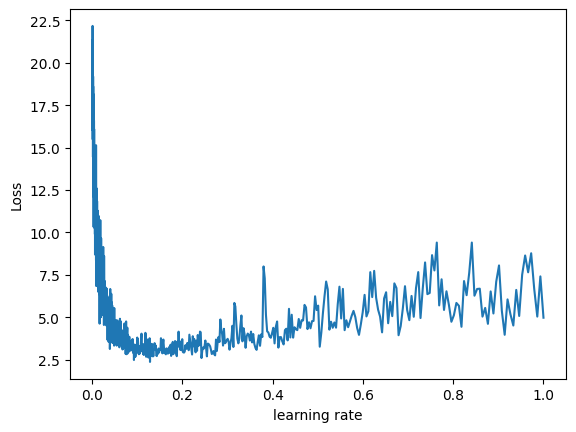

In [ ]:
plt.plot(lratei, losses)
plt.ylabel('Loss')
plt.xlabel('learning rate')


Text(0.5, 0, 'learning rate(exp)')

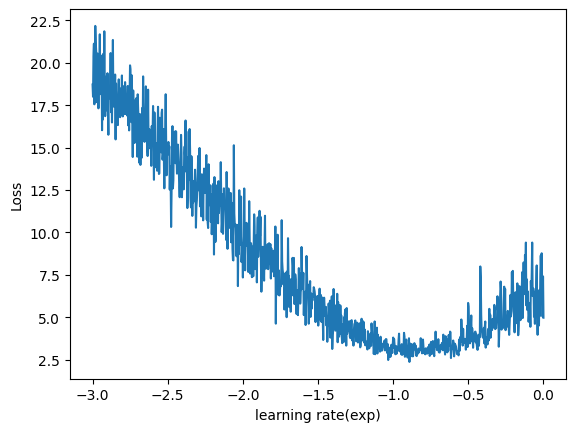

In [ ]:
plt.plot(lratee, losses)
plt.ylabel('Loss')
plt.xlabel('learning rate(exp)')

In [ ]:
lrs[losses.index(min(losses))] # Good learning rate

tensor(0.1283)

**We will now train the model using minibatch for 25000 epochs with a learning rate of 0.12**





In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g,requires_grad= True)

# Weights and bias
W1 = torch.randn((6, 100), generator=g, requires_grad= True)
b1 = torch.randn(100, generator=g,requires_grad= True)

W2 = torch.randn((100, 27), generator=g,requires_grad= True)
b2 = torch.randn(27, generator=g,requires_grad= True)

parameters = [C, W1, b1, W2, b2]

In [ ]:
lr = 0.12

for epoch in range(25000):

  # minibatch
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]   # (32, 2, 3)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)   # (32, 100)
  logits = h @ W2 + b2   # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update parameters
  for p in parameters:
    p.data += -lr * p.grad

In [ ]:
loss.item()

2.301452875137329

* Training set - parameter tuning (80%)
* Validataion set - hyperparamter tuning (10%)
* Test set - evaluation (10%)

# **Actual model**

In [ ]:
def build_dataset(words):
  # build the dataset

  block_size = 3 # context length: how many characters do we take to predict the next one
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '---->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [ ]:
import random

random.seed(42)
random.shuffle(words)

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g,requires_grad= True)

# Weights and bias
W1 = torch.randn((6, 100), generator=g, requires_grad= True)
b1 = torch.randn(100, generator=g,requires_grad= True)

W2 = torch.randn((100, 27), generator=g,requires_grad= True)
b2 = torch.randn(27, generator=g,requires_grad= True)

parameters = [C, W1, b1, W2, b2]

In [ ]:
lr = 0.12

for epoch in range(50000):

  # minibatch
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]]   # (32, 2, 3)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)   # (32, 100)
  logits = h @ W2 + b2   # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update parameters
  for p in parameters:
    p.data += -lr * p.grad

In [ ]:
loss.item()

2.629160165786743

In [ ]:
emb = C[Xtr]   # (32, 2, 3)
h = torch.tanh(emb.view(-1,6) @ W1 + b1)   # (32, 100)
logits = h @ W2 + b2   # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3721, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xval]   # (32, 2, 3)
h = torch.tanh(emb.view(-1,6) @ W1 + b1)   # (32, 100)
logits = h @ W2 + b2   # (32, 27)
loss = F.cross_entropy(logits, Yval)
loss

tensor(2.3745, grad_fn=<NllLossBackward0>)

We can change those hyper parameters and can work with them

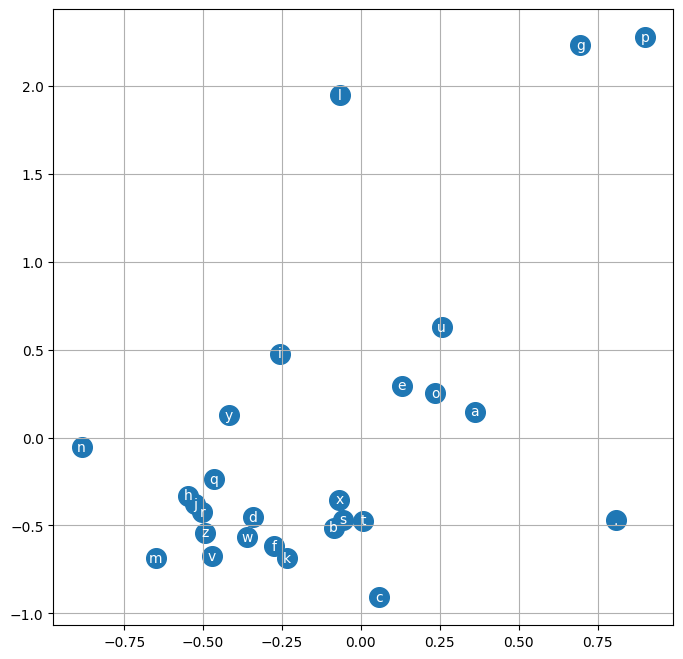

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

erra.
amyan.
reel.
ndhayla.
renvrarendrari.
azeredieliigh.
piren.
edeisennanar.
ellynoh.
kalin.
sadbergias.
jest.
juir.
jelionn.
puoriu.
zen.
dar.
yadul.
eli.
kay.


## **Optimise the above model here**

In [ ]:
def build_dataset(words):
  # build the dataset

  block_size = 4 # context length: how many characters do we take to predict the next one
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '---->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 6), generator=g,requires_grad= True)  # Gonna use len6 embeddings

# Weights and bias
W1 = torch.randn((24, 200), generator=g, requires_grad= True)
b1 = torch.randn(200, generator=g,requires_grad= True)

W2 = torch.randn((200, 27), generator=g,requires_grad= True)
b2 = torch.randn(27, generator=g,requires_grad= True)

parameters = [C, W1, b1, W2, b2]

In [ ]:
import random

random.seed(35)
random.shuffle(words)

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182602, 4]) torch.Size([182602])
torch.Size([22808, 4]) torch.Size([22808])
torch.Size([22736, 4]) torch.Size([22736])


In [ ]:
losses = []

In [ ]:
lr = 0.12

for epoch in range(200000):

  if epoch > 100000:
    lr = 0.01
  if epoch > 180000:
    lr = 0.001

  # minibatch
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1,24) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update parameters
  for p in parameters:
    p.data += -lr * p.grad

  losses.append(loss.item())

Text(0.5, 1.0, 'Minibatch descend stat(lr = 0.1, 0.01, 0.001)')

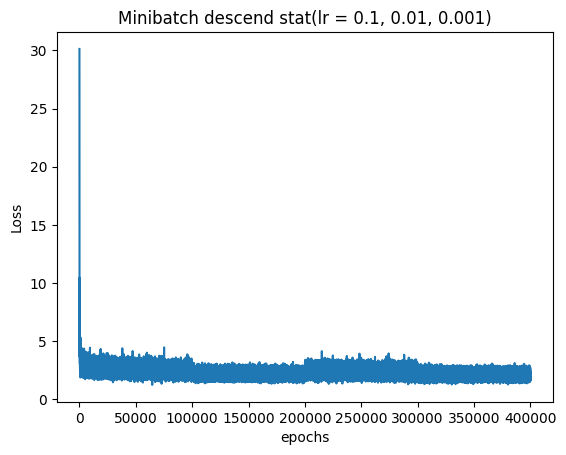

In [ ]:
plt.plot(range(400000), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.title('Minibatch descend stat(lr = 0.1, 0.01, 0.001)')

In [ ]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,24) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0900, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xval]   # (32, 2, 3)
h = torch.tanh(emb.view(-1,24) @ W1 + b1)   # (32, 100)
logits = h @ W2 + b2   # (32, 27)
loss = F.cross_entropy(logits, Yval)
loss

tensor(2.1603, grad_fn=<NllLossBackward0>)

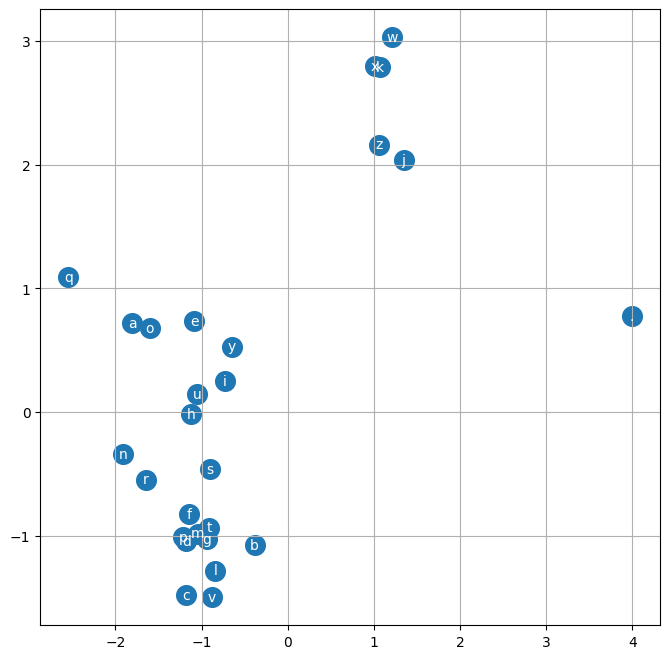

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
block_size = 4

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mora.
mayanna.
elme.
hayla.
revyan.
endra.
gradeer.
melii.
shilopa.
edelisan.
nara.
myzios.
kalin.
sheber.
shirie.
trin.
renelionn.
puca.
ubabecda.
kyleug.
